<a href="https://colab.research.google.com/github/sabrinapurwalian/CAPSTONE-EV-CHARGING-ANALYSIS-IN-INDONESIA/blob/main/EV_CHARGING_INDONESIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Upload file dulu
from google.colab import files
uploaded = files.upload()

# Baca file CSV
df = pd.read_csv(list(uploaded.keys())[0])

# Cek kolom yang tersedia
print(df.columns)

# Tambahkan kolom klasifikasi readiness
def classify_readiness(row):
    if row['ports'] >= 10 and row['power_kw'] >= 50 and row['is_fast_dc'] == True:
        return 'Ready'
    elif row['ports'] >= 5 and row['power_kw'] >= 22:
        return 'Developing'
    else:
        return 'Lagging'

df['readiness_category'] = df.apply(classify_readiness, axis=1)

# Tampilkan hasil klasifikasi
df[['city', 'state_province', 'ports', 'power_kw', 'is_fast_dc', 'readiness_category']].head(10)

Saving charging_stations_2025_world.csv to charging_stations_2025_world.csv
Index(['id', 'name', 'city', 'country_code', 'state_province', 'latitude',
       'longitude', 'ports', 'power_kw', 'power_class', 'is_fast_dc'],
      dtype='object')


,city,state_province,ports,power_kw,is_fast_dc,readiness_category
0,Andorra,NaN,10,300.0,True,Ready
1,Encamp,NaN,10,22.0,False,Developing
2,NaN,NaN,1,11.0,False,Lagging
3,NaN,NaN,1,22.0,False,Lagging
4,NaN,NaN,3,11.0,False,Lagging
5,NaN,NaN,2,22.0,False,Lagging
6,NaN,NaN,3,11.0,False,Lagging
7,NaN,NaN,1,11.0,False,Lagging
8,Encamp,NaN,1,11.0,False,Lagging
9,Encamp,NaN,1,7.4,False,Lagging


In [5]:
# Hitung jumlah site per kategori
readiness_summary = df['readiness_category'].value_counts()
print(readiness_summary)

# Distribusi per provinsi
prov_summary = df.groupby(['state_province', 'readiness_category']).size().unstack().fillna(0)
print(prov_summary)

readiness_category
Lagging       231579
Developing      8018
Ready           2820
Name: count, dtype: int64
readiness_category  Developing  Lagging  Ready
state_province                                
(PA)                       0.0      1.0    0.0
(UD)                       0.0      1.0    0.0
-                          0.0      3.0    0.0
0                          0.0      6.0    0.0
29339                      0.0      1.0    0.0
...                        ...      ...    ...
茨城県                        0.0      1.0    0.0
長野県                        0.0      7.0    0.0
静岡県                        0.0      2.0    0.0
香川県                        0.0      1.0    0.0
鹿児島県                       1.0      0.0    0.0

[5988 rows x 3 columns]


In [6]:
df_id = df[df['country_code'] == 'ID']
df_id.head()

,id,name,city,country_code,state_province,latitude,longitude,ports,power_kw,power_class,is_fast_dc,readiness_category
111878,460417,Alun Alun Peliatan Ubud,Ubud,ID,Bali,-8.517803,115.268901,1,100.0,DC_FAST_(50-149kW),True,Lagging
111879,460416,SPKLU Puspem Badung,Mengwi,ID,Bali,-8.602436,115.180445,1,200.0,DC_ULTRA_(>=150kW),True,Lagging
111880,460415,Rest Area KM 38 B Jagorawi,Bogor,ID,Jawa Barat,-6.576014,106.838077,1,120.0,DC_FAST_(50-149kW),True,Lagging
111881,460407,Rest Area KM 753 B Surabaya Gempol,Gempo,ID,East Java,-7.417816,112.693708,1,47.0,AC_HIGH_(22-49kW),False,Lagging
111882,460402,"Rest Area Soka , Raya DPS Gilimanuk",Kabupaten Tabanan,ID,Bali,-8.528572,114.996856,1,50.0,DC_FAST_(50-149kW),True,Lagging


In [7]:
print("Jumlah data Indonesia:", len(df_id))

Jumlah data Indonesia: 412


In [8]:
def classify_readiness(row):
    if row['ports'] >= 10 and row['power_kw'] >= 50 and row['is_fast_dc'] == True:
        return 'Ready'
    elif row['ports'] >= 5 and row['power_kw'] >= 22:
        return 'Developing'
    else:
        return 'Lagging'

df_id['readiness_category'] = df_id.apply(classify_readiness, axis=1)
df_id[['city', 'state_province', 'ports', 'power_kw', 'is_fast_dc', 'readiness_category']].head()

/tmp/ipython-input-1295074257.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id['readiness_category'] = df_id.apply(classify_readiness, axis=1)


,city,state_province,ports,power_kw,is_fast_dc,readiness_category
111878,Ubud,Bali,1,100.0,True,Lagging
111879,Mengwi,Bali,1,200.0,True,Lagging
111880,Bogor,Jawa Barat,1,120.0,True,Lagging
111881,Gempo,East Java,1,47.0,False,Lagging
111882,Kabupaten Tabanan,Bali,1,50.0,True,Lagging


In [9]:
# Ringkasan jumlah per kategori
df_id['readiness_category'].value_counts()

,count
readiness_category,
Lagging,411
Developing,1


In [10]:
# Distribusi per provinsi
df_id.groupby(['state_province', 'readiness_category']).size().unstack().fillna(0)

readiness_category,Developing,Lagging
state_province,,
Aceh,0.0,8.0
Aceh Tengah,0.0,1.0
Bali,0.0,21.0
Bangka Belitung,0.0,1.0
Banten,0.0,27.0
Bengkulu,0.0,1.0
Central Java,0.0,6.0
DKI Jakarta,0.0,3.0
Daerah Istimewa Yogyakarta,0.0,2.0


In [11]:
# Ambil subset data untuk prompt
subset = df_id[['city', 'state_province', 'ports','power_kw', 'power_class', 'is_fast_dc', 'readiness_category']].head(20)

# Ubah ke format dictionary
subset_dict = subset.to_dict(orient='records')

# Tampilkan hasilnya
import json
print(json.dumps(subset_dict, indent=2))

[
  {
    "city": "Ubud",
    "state_province": "Bali",
    "ports": 1,
    "power_kw": 100.0,
    "power_class": "DC_FAST_(50-149kW)",
    "is_fast_dc": true,
    "readiness_category": "Lagging"
  },
  {
    "city": "Mengwi",
    "state_province": "Bali",
    "ports": 1,
    "power_kw": 200.0,
    "power_class": "DC_ULTRA_(>=150kW)",
    "is_fast_dc": true,
    "readiness_category": "Lagging"
  },
  {
    "city": "Bogor",
    "state_province": "Jawa Barat",
    "ports": 1,
    "power_kw": 120.0,
    "power_class": "DC_FAST_(50-149kW)",
    "is_fast_dc": true,
    "readiness_category": "Lagging"
  },
  {
    "city": "Gempo",
    "state_province": "East Java",
    "ports": 1,
    "power_kw": 47.0,
    "power_class": "AC_HIGH_(22-49kW)",
    "is_fast_dc": false,
    "readiness_category": "Lagging"
  },
  {
    "city": "Kabupaten Tabanan",
    "state_province": "Bali",
    "ports": 1,
    "power_kw": 50.0,
    "power_class": "DC_FAST_(50-149kW)",
    "is_fast_dc": true,
    "readiness_cat

In [12]:
df_id.to_csv('charging_station_indonesia_2025.csv', index=False)

In [13]:
from google.colab import files
files.download('charging_station_indonesia_2025.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
df_id['readiness_category'].value_counts(normalize=True) * 100

,proportion
readiness_category,
Lagging,99.757282
Developing,0.242718


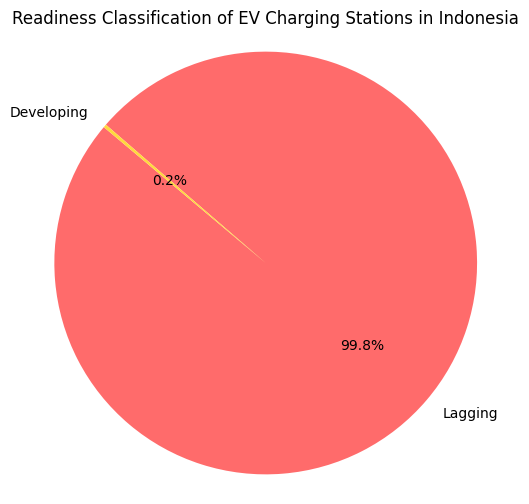

In [15]:
import matplotlib.pyplot as plt

# Hitung distribusi kategori
readiness_counts = df_id['readiness_category'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(readiness_counts, labels=readiness_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF6B6B','#FFD93D','#6BCB77'])
plt.title('Readiness Classification of EV Charging Stations in Indonesia')
plt.axis('equal')
plt.show()

In [18]:
import pandas as pd

df = pd.read_csv('charging_station_indonesia_2025.csv')  # ganti dengan path dataset kamu
df.head()

,id,name,city,country_code,state_province,latitude,longitude,ports,power_kw,power_class,is_fast_dc,readiness_category
0,460417,Alun Alun Peliatan Ubud,Ubud,ID,Bali,-8.517803,115.268901,1,100.0,DC_FAST_(50-149kW),True,Lagging
1,460416,SPKLU Puspem Badung,Mengwi,ID,Bali,-8.602436,115.180445,1,200.0,DC_ULTRA_(>=150kW),True,Lagging
2,460415,Rest Area KM 38 B Jagorawi,Bogor,ID,Jawa Barat,-6.576014,106.838077,1,120.0,DC_FAST_(50-149kW),True,Lagging
3,460407,Rest Area KM 753 B Surabaya Gempol,Gempo,ID,East Java,-7.417816,112.693708,1,47.0,AC_HIGH_(22-49kW),False,Lagging
4,460402,"Rest Area Soka , Raya DPS Gilimanuk",Kabupaten Tabanan,ID,Bali,-8.528572,114.996856,1,50.0,DC_FAST_(50-149kW),True,Lagging


In [21]:
df['power_kw'].value_counts()

,count
power_kw,
22.0,90
50.0,70
7.0,51
60.0,48
25.0,43
200.0,35
30.0,29
100.0,22
120.0,10


In [22]:
def classify_charger_type(power):
    if power < 7:
        return 'AC Level 1'
    elif power < 22:
        return 'AC Level 2'
    elif power <= 150:
        return 'DC Fast'
    else:
        return 'Ultra Fast'

In [23]:
df['Charger_Type'] = df['power_kw'].apply(classify_charger_type)

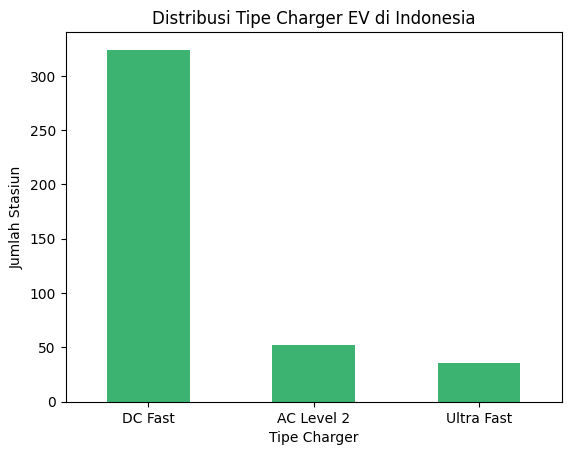

In [24]:
import matplotlib.pyplot as plt

df['Charger_Type'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title('Distribusi Tipe Charger EV di Indonesia')
plt.xlabel('Tipe Charger')
plt.ylabel('Jumlah Stasiun')
plt.xticks(rotation=0)
plt.show()

In [25]:
pd.crosstab(df['Charger_Type'], df['power_class'])

power_class,AC_HIGH_(22-49kW),AC_L1_(<7.5kW),AC_L2_(7.5-21kW),DC_FAST_(50-149kW),DC_ULTRA_(>=150kW)
Charger_Type,,,,,
AC Level 2,0,51,1,0,0
DC Fast,172,0,0,151,1
Ultra Fast,0,0,0,0,36
